In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import math

In [37]:
data = pd.read_excel("data.xlsx", sheet_name="B - bodyfat")

In [38]:
data

,B1,B2,B3,B4,B5,B6,B7,B8,B9,B10,B11,B12,B13,B14,B15,B16,B17,B18
0,1.0708,12.3,normal,23,Male,Somerville,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,low,22,Male,Somerville,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,high,22,Male,Somerville,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,normal,26,Male,Somerville,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,high,24,Male,Somerville,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.0736,11.0,normal,70,Male,Revere,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,1.0236,33.6,high,72,Female,Revere,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,1.0328,29.3,high,72,Female,Revere,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,1.0399,26.0,high,72,Female,Revere,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8


# Задание 1

In [39]:
task1_1_data = data.loc[:, "B10":"B12"]


pd.DataFrame({"Среднее" : task1_1_data.mean(), 
              "Выборочная дисперсия": task1_1_data.var(ddof=0),
              "Выборочное среднеквадратическое отклонение": task1_1_data.std(ddof=0),
              "Выборочный коэффициент асимметрии": stats.skew(task1_1_data),
              "Выборочный эксцесс": stats.kurtosis(task1_1_data)
              }).T

,B10,B11,B12
Среднее,100.824206,92.555952,99.904762
Выборочная дисперсия,70.790882,115.813338,51.120057
Выборочное среднеквадратическое отклонение,8.413732,10.761661,7.149829
Выборочный коэффициент асимметрии,0.677492,0.833419,1.488201
Выборочный эксцесс,0.944086,2.180736,7.300217


In [51]:
task1_2_data = data.loc[:, "B10"]
bins = math.floor(math.log2(data.index.size) + 1)
hist, edges = np.histogram(task1_2_data, bins=bins)
print(f"bins: {bins}  length: {(task1_2_data.max() - task1_2_data.min()) / bins}")

result = pd.DataFrame(columns=["Нижняя граница",\
                                "Верхняя граница",\
                                "Частота",\
                                "Относит. частота",\
                                "Накопл. частота",\
                                "Относит. накопл. частота",]\
)

sum = 0
n = task1_2_data.size
for i in range(hist.size):
    min = edges[i]
    max = edges[i + 1]
    sum += hist[i]
    result.loc[i]=[min, max, hist[i], hist[i] / n, sum, sum / n]

result


bins: 8  length: 7.112499999999999


,Нижняя граница,Верхняя граница,Частота,Относит. частота,Накопл. частота,Относит. накопл. частота
0,79.3000,86.4125,4.0,0.015873,4.0,0.015873
1,86.4125,93.5250,51.0,0.202381,55.0,0.218254
2,93.5250,100.6375,80.0,0.317460,135.0,0.535714
3,100.6375,107.7500,75.0,0.297619,210.0,0.833333
4,107.7500,114.8625,23.0,0.091270,233.0,0.924603
5,114.8625,121.9750,17.0,0.067460,250.0,0.992063
6,121.9750,129.0875,1.0,0.003968,251.0,0.996032
7,129.0875,136.2000,1.0,0.003968,252.0,1.000000


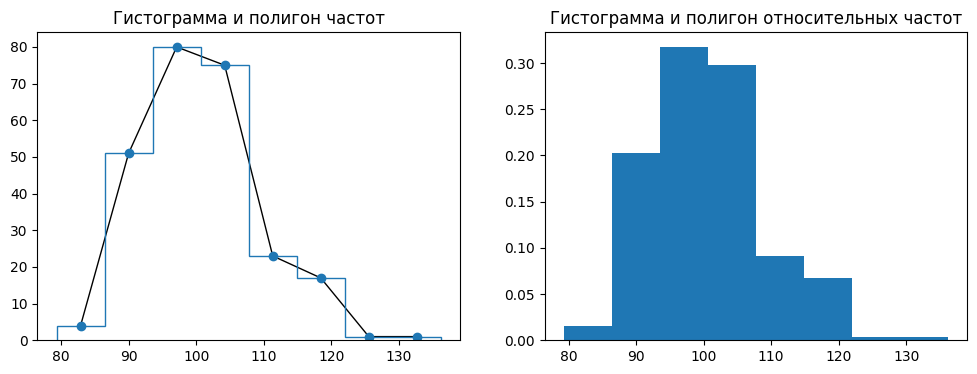

In [88]:
from matplotlib.patches import Polygon

fig, ax = plt.subplots(1, 2)
fig.set_size_inches(12, 4)

ax[0].set_title("Гистограмма и полигон частот")
points = np.array([[(edges[i+1] - edges[i]) / 2 + edges[i], hist[i]] for i in range(hist.size)])
points = np.vstack([points, [edges[0] - ]])
ax[0].add_patch(Polygon(points, closed=False, fill=False))
ax[0].scatter(points[:, 0], points[:, 1])
ax[0].stairs(hist, edges=edges, fill=False)

ax[1].set_title("Гистограмма и полигон относительных частот")
ax[1].stairs(hist / n, edges=edges, fill=True)


In [66]:
[[(edges[i] - edges[i + 1]) / 2 + edges[i], hist[i]] for i in range(hist.size)]

[[75.74375, 4],
 [82.85624999999999, 51],
 [89.96875, 80],
 [97.08124999999998, 75],
 [104.19375000000001, 23],
 [111.30624999999998, 17],
 [118.41875, 1],
 [125.53124999999997, 1]]

In [89]:
points

array([[ 82.85625,   4.     ],
       [ 89.96875,  51.     ],
       [ 97.08125,  80.     ],
       [104.19375,  75.     ],
       [111.30625,  23.     ],
       [118.41875,  17.     ],
       [125.53125,   1.     ],
       [132.64375,   1.     ]])